# Topic: Decision Trees


In [8]:
#Importing the necessary packages

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn import svm
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix


## **Section 1 - Classification with Decision Trees**

- What is a decision tree and how is a DT used to made a prediction.
- How the complexity of tree effects its performance. (An example where increasing the complexity improves the performance.)
- Notion of Entropy and Information Gain and how they can be used to create a tree.
- Nature of decision boundaries made by DTs.


**Decision Trees** are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.

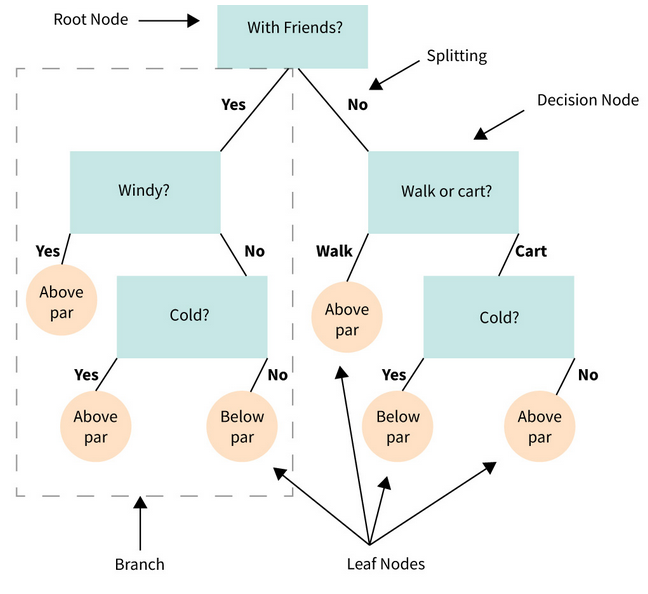


Moving on to a hand-on example, let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset.

### Code for the core experiment: 

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [20]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None,
                      feature_names : list = None, class_names : list = None,
                      criterion = "gini", min_samples_split : int = 2 , 
                      min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

    clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
    X_train, y_train = trainSet
    X_test, y_test = testSet

    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

    print("The confusion matrix is : ")
    plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names)


    print("Here is a diagram of the tree created to evaluate each sample:")
    fig, ax = plt.subplots(figsize=(12,10))
    imgObj = tree.plot_tree(clf, filled=True, ax=ax, 
                            feature_names = feature_names, 
                            class_names = class_names, impurity=True,
                            proportion=False, rounded=True, fontsize = 12)
    plt.show()


def giveAnExample(n : int): # n = depth
    performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], 
                      class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
    plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
    plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

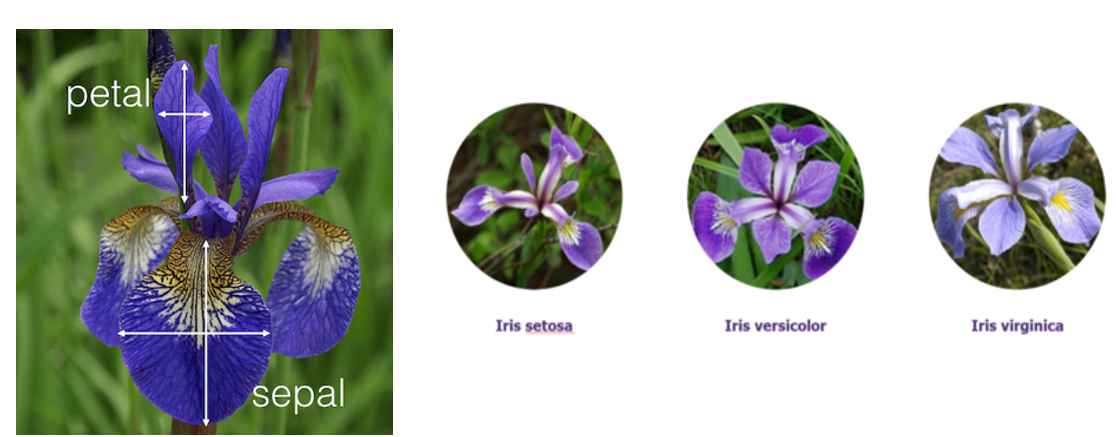

In [6]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pd.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

# Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 2]
Accuracy of the decision tree on the test set: 

0.895


The confusion matrix is : 
Here is a diagram of the tree created to evaluate each sample:


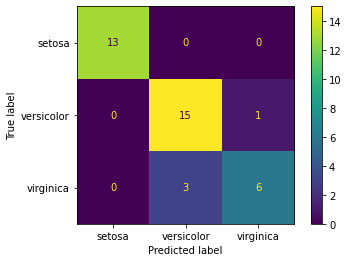

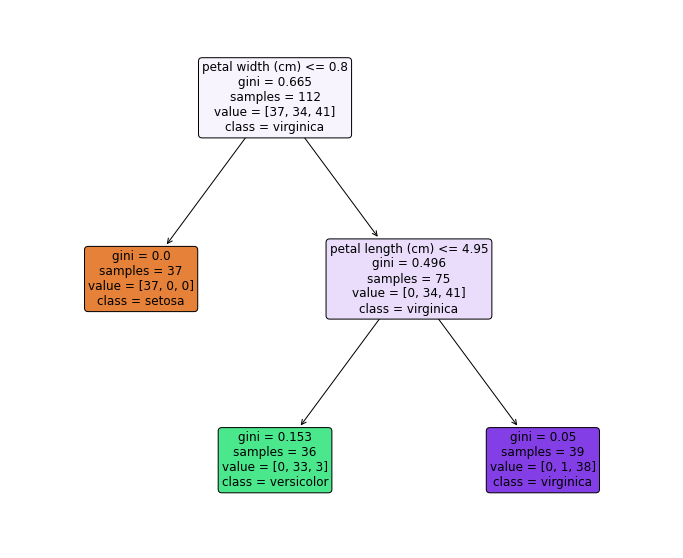

In [21]:
giveAnExample(2)

### Exercise 1:
 Kindly use the above tree to evaluate the classes for the following examples and verify what percent of them are classified correctly by the tree:

In [ ]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa




---



Accuracy of the decision tree on the test set: 

0.974


The confusion matrix is : 
Here is a diagram of the tree created to evaluate each sample:


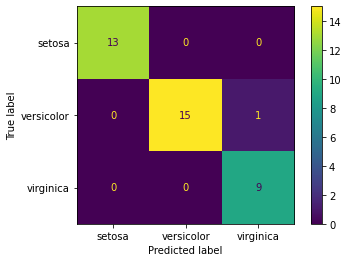

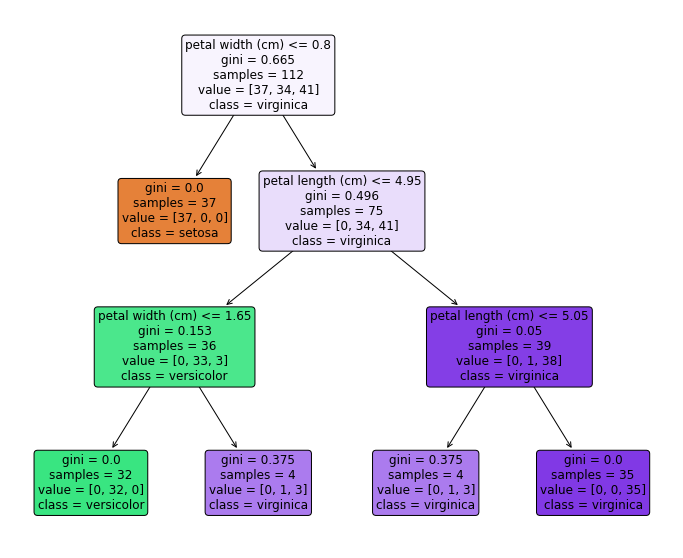

In [10]:
giveAnExample(3)

### Exercise 2:
Repeat Exercise 1 for the above tree as well.


---



We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

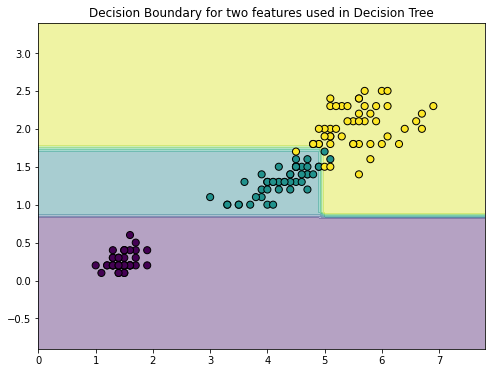

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

**Decision boundary** with considering **sepal width and length**:

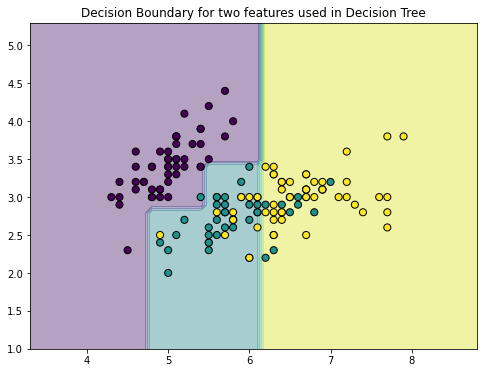

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal length and petal length**:

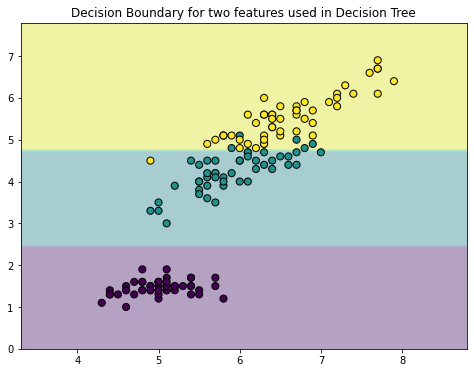

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal width and petal width**:

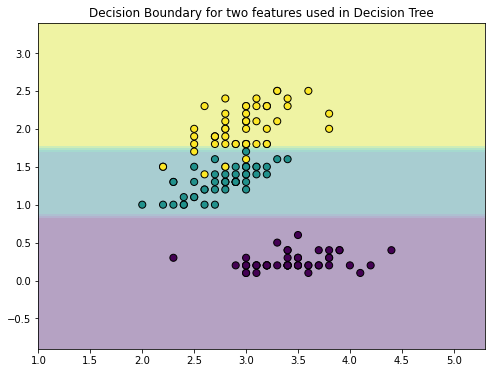

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

---

### Exercise 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and then pause and ponder.

Test with `max_depth` of the following values:
- 2
- 5
- 10


What do you observe?

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

---


### Exercise 4:

Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower. Use the decision tree made in Exercise 2 and realise the logic using multiple nested `if else` statements. 

In [ ]:
def predictSpecies(sepal_width, sepal_length, petal_width,  petal_length) -> str :
  """
    Write your program here to return the species of the plant (string) using if else statements.
  """
  pass

---

## Entropy and Information:

### How are decision trees built? 

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). 
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree. 

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division. 

$$IG(X) = E(s) - E(s, X)$$

In [ ]:
irisData.sample(n = 10, random_state = 5)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


## Exercise 5:
Calculate the Entropy of the above collection of 10 datapoints. 

---

## Exercise 6: 
Suggest a decision node (if, else) statement which divides the group into two groups. Also compute the Information Gain in that division step. Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

--- 

## **Section 2 - DT Learning**

- Introduction to Gini Index and how can it be used to create decision tree.
- Curse of Overfitting and how it affects decision trees.
- Application of Decision Trees on a real dataset and further experiments.

In [11]:
# Re-defining and adding functions for Section 2

def performExperiment(trainSet : tuple, testSet : tuple, 
                      max_depth : int = None, feature_names : list = None, 
                      class_names : list = None, criterion = "gini", 
                      min_samples_split : int = 2 , min_samples_leaf = 1, 
                      drawTree = (8,6)):
  #Importing the Decision tree classifier from sklearn:

    clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
    X_train, y_train = trainSet
    X_test, y_test = testSet

    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

    print("The confusion matrix is : ")
  
    fig, ax = plt.subplots(figsize=(3, 3))
    plot_confusion_matrix(clf, X_test, y_test, display_labels=class_names, ax=ax)
    plt.show()

    if drawTree:
        print("Here is a diagram of the tree created to evaluate each sample:")
        fig, ax = plt.subplots(figsize=drawTree)
        imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, 
                                class_names = class_names, impurity=False, proportion=True, 
                                rounded=True, fontsize = 10)
        plt.show()

def returnAccuracy(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, 
                   class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
    clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0)           
    X_train, y_train = trainSet
    X_test, y_test = testSet

    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return accuracy_score(y_pred, y_test)

def giveAnExample(n : int):
    performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], 
                      class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))
  
    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)
    plt.figure(figsize=(5,4))
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
    plt.show()

## Gini Impurity:

Gini Impurity is another metric like Entropy which can be used to score a group's homogenity. 
A group's Gini Impurity is given by:

$$ \text{Gini Index} = 1 - \sum_{i=1}^{c} p_i^2 $$

Whichever division leads to minimum impurity among the divided class is chosen to be the split at that stage.

`Impurity of a division =  Weighted sum of the impurity of the subgroups made after the division`

Among Gini impurity and Information Gain, there isn't a clear cut better method of developing a decision tree. Though many a times Gini Impurity is the preferred method since it is computationally lesser expensive.

Let us create a synthetic dataset:

In [ ]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

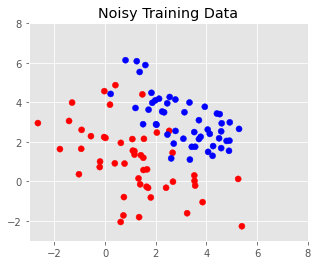

(-3.0, 8.0)

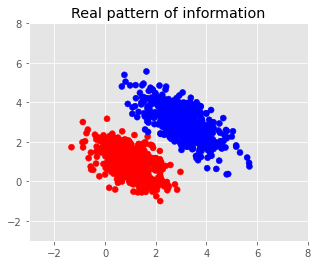

In [ ]:
plt.figure(figsize=(5,4))
plt.style.use("ggplot")
plt.scatter(ar[:, 0], ar[:, 1], c = np.array(["r"] * int((ar.shape[0]/2)) + ["b"] * int((ar.shape[0]/2))), )
plt.title("Noisy Training Data")
plt.xlim((-3, 8))
plt.ylim((-3, 8))

plt.show()

plt.figure(figsize=(5,4))
plt.title("Real pattern of information")
plt.scatter(testAr[:, 0], testAr[:, 1], c = np.array(["r"] * int((testAr.shape[0]/2)) + ["b"] * int((testAr.shape[0]/2))), )

plt.xlim((-3, 8))
plt.ylim((-3, 8))

Text(0.5, 0, 'Depth of the tree')

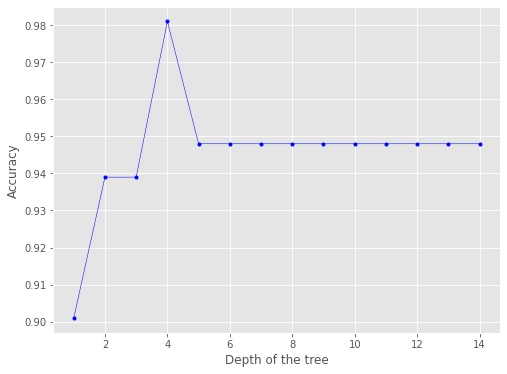

In [ ]:
X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

plt.figure(figsize=(8,6))
fro, to = 1, 15
plt.plot(range(fro, to), [returnAccuracy((X, y), (testAr, testy), max_depth = i) for i in range(fro, to)], "b.-", linewidth=0.5)
plt.ylabel("Accuracy")
plt.xlabel("Depth of the tree")

Depth = 1


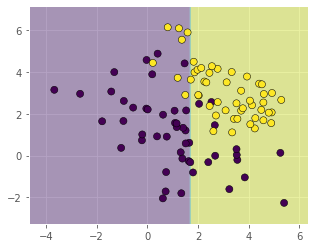

Depth = 2


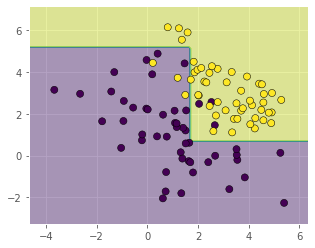

Depth = 4


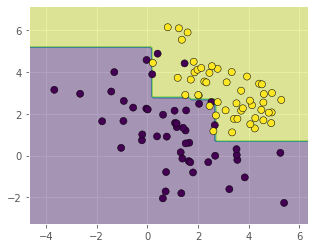

Depth = 8


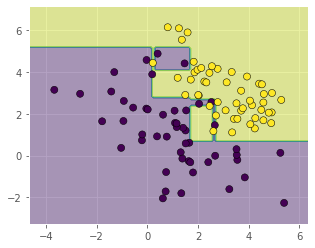

In [ ]:
def boundaryExp(d) :

    clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = d)
    pair = [0, 1]
    clf.fit(X[:, pair], y)
    print("Depth = {}".format(d))
    plotDecisionBoundary(X, y, pair, clf)
    plt.show()


_ = [boundaryExp(i) for i in [1, 2, 4, 8]]

Accuracy of the decision tree on the test set: 

0.939


The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


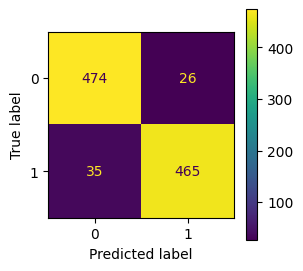

Here is a diagram of the tree created to evaluate each sample:


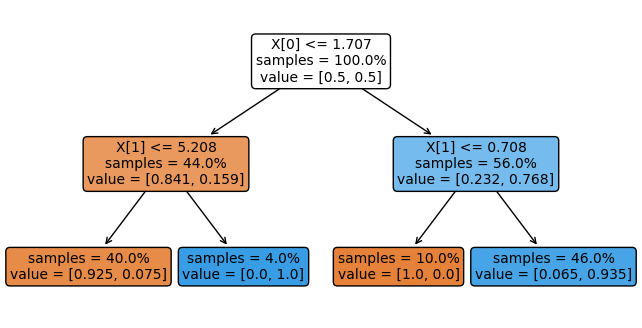

In [ ]:
plt.style.use("default")
performExperiment((X, y), (testAr, testy), max_depth = 2, drawTree = (8,4))

Accuracy of the decision tree on the test set: 

0.981


The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


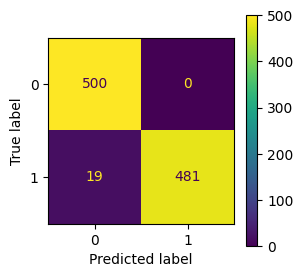

Here is a diagram of the tree created to evaluate each sample:


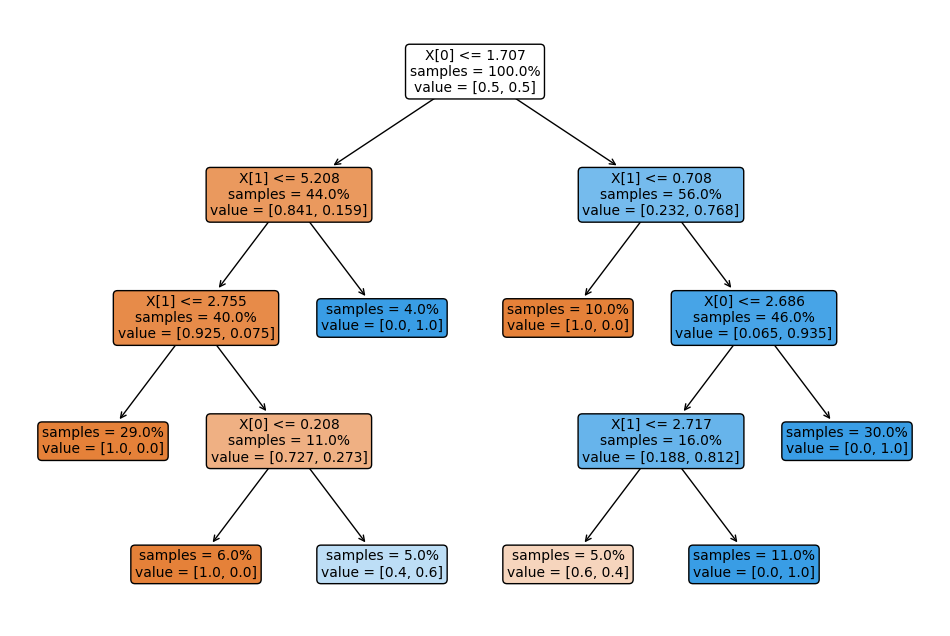

In [ ]:
plt.style.use("default")
performExperiment((X, y), (testAr, testy), max_depth = 4, drawTree= (12, 8))

Accuracy of the decision tree on the test set: 

0.948


The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


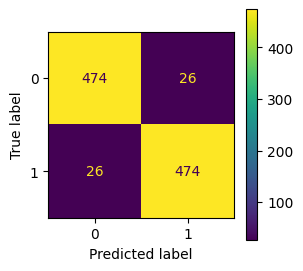

In [ ]:
plt.style.use("default")
performExperiment((X, y), (testAr, testy), max_depth = 8, drawTree = False)

Now that we have looked at the curse of overfitting and its consequence on the test accuracy, let us try to delve deeper and try to understand that why is it such a serious issue especially for Decision Tree.



---




## Finding Pattern out of nowhere?

In the following cell we are generating a series of random numbers from a 2-D uncorrelated Gaussian distribution. And then we randomly assign a class to each of these datapoints. i.e There exists no real pattern in the dataset and we are simply giving them a class arbitrarily.

Now let us see how out decision tree does on this when the same set is used as the test set as well.

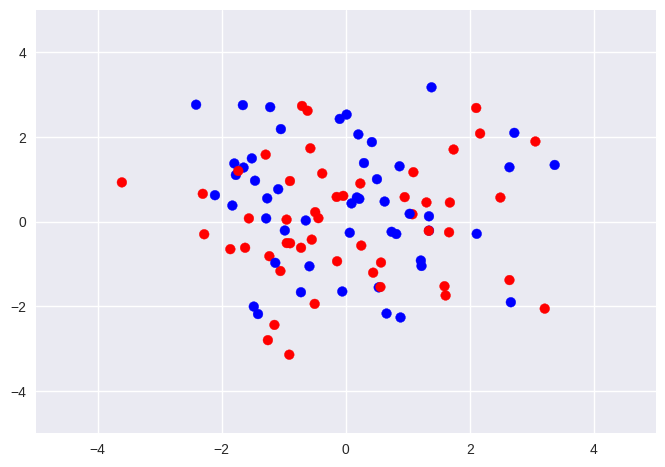

In [ ]:
SIZE_DECOY = 100
np.random.seed(0)
simpleDat = np.random.multivariate_normal((0, 0), [[2, 0], [0, 2]], size = SIZE_DECOY)
decoyY = np.random.randint(0, 2, size = SIZE_DECOY)
COLS = ["red", "blue"]
plt.style.use("seaborn")
plt.scatter(simpleDat[:, 0], simpleDat[:, 1], c = [COLS[i] for i in decoyY])
plt.xlim((-5, 5)), plt.ylim((-5, 5))
plt.show()

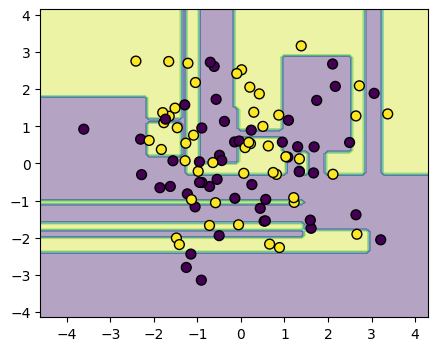

Accuracy of the decision tree on the test set: 

1.000


The confusion matrix is : 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


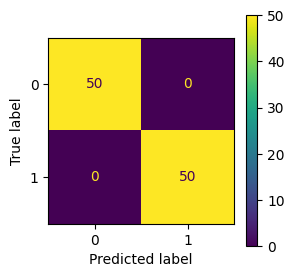

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0)
pair = [0, 1]
clf.fit(simpleDat[:, pair], decoyY)
plt.style.use("default")
plotDecisionBoundary(simpleDat, decoyY, pair, clf)
plt.show()

performExperiment((simpleDat, decoyY), (simpleDat, decoyY), drawTree=False)